# Zindi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from tqdm import tqdm, tqdm_notebook
import copy
from sklearn.impute import SimpleImputer

from catboost import CatBoostClassifier
from catboost.utils import get_gpu_device_count
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [3]:
pd.set_option("display.max_columns", None)

trainset = pd.read_csv("Train.csv")
trainset

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29127,8SBA93U,1/9/2019,F,M,1974,748L,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
29128,Y73ETTO,1/11/2018,M,M,1987,XX25,Q6J6,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
29129,MVXG2LC,1/2/2019,M,M,1985,BOAS,6PE7,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
29130,BUQ8DQN,1/7/2019,M,M,1989,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [4]:
testset = pd.read_csv("Test.csv")
testset

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,F86J5PC,1/12/2018,M,M,1984,94KC,DZRV,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,H6141K3,1/10/2019,M,M,1996,1X1H,J9SY,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,RBAYUXZ,1/1/2020,F,W,1968,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,KCBILBQ,1/2/2019,M,M,1989,94KC,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,LSEC1ZJ,1/2/2020,F,M,1982,UAOD,0KID,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0GMU5UH,1/4/2019,F,M,1986,748L,2A7I,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
9996,I9W11CD,1/8/2019,M,M,1980,UAOD,0KID,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,42WTEGT,1/4/2018,M,M,1993,748L,SST3,56SI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9998,8EKC4O9,1/5/2015,F,U,1981,49BM,2A7I,T4MS,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [5]:
submission = pd.read_csv('SampleSubmission.csv')
submission

,ID X PCODE,Label
0,F86J5PC X P5DA,0
1,F86J5PC X RIBP,0
2,F86J5PC X 8NN1,0
3,F86J5PC X 7POT,0
4,F86J5PC X 66FJ,0
...,...,...
209995,WHII93K X JWFN,0
209996,WHII93K X JZ9D,0
209997,WHII93K X J9JW,0
209998,WHII93K X GHYX,0


In [6]:
products_name = [
    'P5DA', 'RIBP', '8NN1', '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ',
    'LJR9', 'N2MW', 'AHXO', 'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D',
    'J9JW', 'GHYX', 'ECY3'
]

## Exploration des données

### Copie des données

In [7]:
train = trainset.copy()

### Valeurs manquantes

In [8]:
def missing_value_rate(data):
    return 100 * data.isna().sum() / data.shape[0]

In [9]:
missing_value_rate(train)

ID                          0.000000
join_date                   0.006865
sex                         0.000000
marital_status              0.000000
birth_year                  0.000000
branch_code                 0.000000
occupation_code             0.000000
occupation_category_code    0.000000
P5DA                        0.000000
RIBP                        0.000000
8NN1                        0.000000
7POT                        0.000000
66FJ                        0.000000
GYSR                        0.000000
SOP4                        0.000000
RVSZ                        0.000000
PYUQ                        0.000000
LJR9                        0.000000
N2MW                        0.000000
AHXO                        0.000000
BSTQ                        0.000000
FM3X                        0.000000
K6QO                        0.000000
QBOL                        0.000000
JWFN                        0.000000
JZ9D                        0.000000
J9JW                        0.000000
G

### Type de données

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        29132 non-null  object
 1   join_date                 29130 non-null  object
 2   sex                       29132 non-null  object
 3   marital_status            29132 non-null  object
 4   birth_year                29132 non-null  int64 
 5   branch_code               29132 non-null  object
 6   occupation_code           29132 non-null  object
 7   occupation_category_code  29132 non-null  object
 8   P5DA                      29132 non-null  int64 
 9   RIBP                      29132 non-null  int64 
 10  8NN1                      29132 non-null  int64 
 11  7POT                      29132 non-null  int64 
 12  66FJ                      29132 non-null  int64 
 13  GYSR                      29132 non-null  int64 
 14  SOP4                  

### Values

In [11]:
train.head(1)

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


#### join_date

In [12]:
train['join_date'].value_counts()

1/5/2018      1319
1/5/2019      1199
1/4/2018      1123
1/4/2019      1043
1/1/2019       754
              ... 
7/9/2012         1
8/9/2012         1
23/5/2013        1
22/10/2012       1
11/1/2013        1
Name: join_date, Length: 132, dtype: int64

#### sex

M    20329
F     8803
Name: sex, dtype: int64

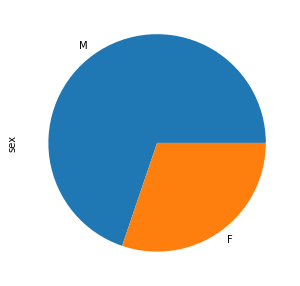

In [13]:
# sex
train['sex'].value_counts().plot.pie(figsize=(5,5))
train['sex'].value_counts()

#### marital_status

M    22913
S     3267
U     2474
W      301
D      135
R       34
P        7
f        1
Name: marital_status, dtype: int64

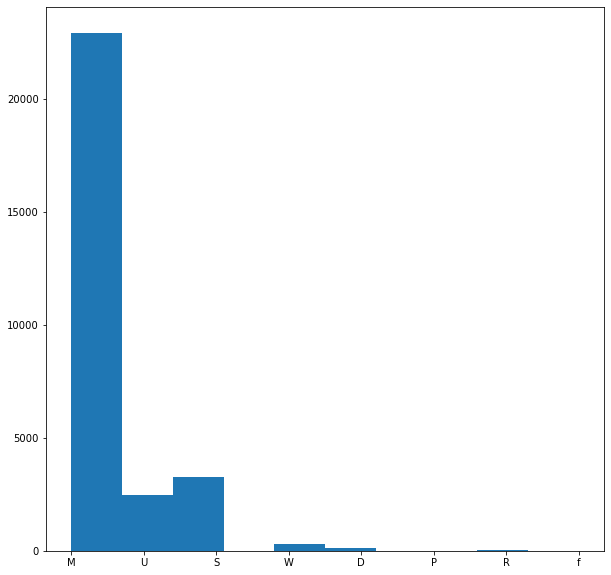

In [14]:
plt.figure(figsize=(10,10))
plt.hist(train['marital_status'])
train['marital_status'].value_counts()

#### birth_year

1983    1263
1984    1241
1982    1222
1980    1143
1986    1097
        ... 
2005       1
1951       1
1932       1
2011       1
1936       1
Name: birth_year, Length: 61, dtype: int64

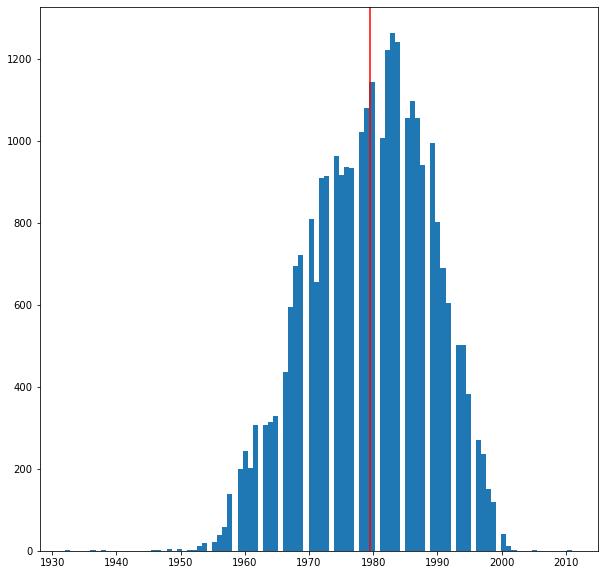

In [15]:
plt.figure(figsize=(10,10))
plt.hist(train['birth_year'], bins=100)
plt.axvline(train['birth_year'].mean(), c='red')
train['birth_year'].value_counts()

#### branch_code

748L    8136
94KC    3658
UAOD    3507
E5SW    3185
30H5    3151
XX25    2805
1X1H    1303
O67J    1125
ZFER     747
49BM     621
9F9T     429
BOAS     347
X23B      99
O4JC      10
EU3L       9
Name: branch_code, dtype: int64

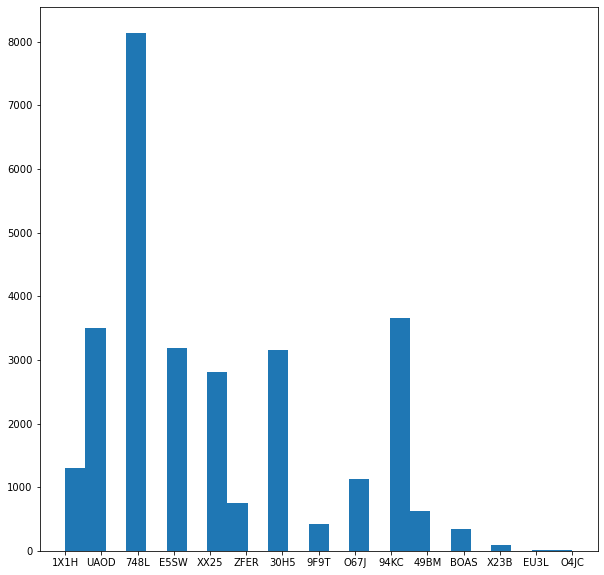

In [16]:
plt.figure(figsize=(10,10))
plt.hist(train['branch_code'], bins=25)
train['branch_code'].value_counts()

C:\Users\Tsitohaina\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname I identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


2A7I    7089
0KID    3969
SST3    2711
UJ5T    2079
0OJM    1565
        ... 
VZN9       1
URYD       1
5OVC       1
5LNN       1
KBWO       1
Name: occupation_code, Length: 233, dtype: int64

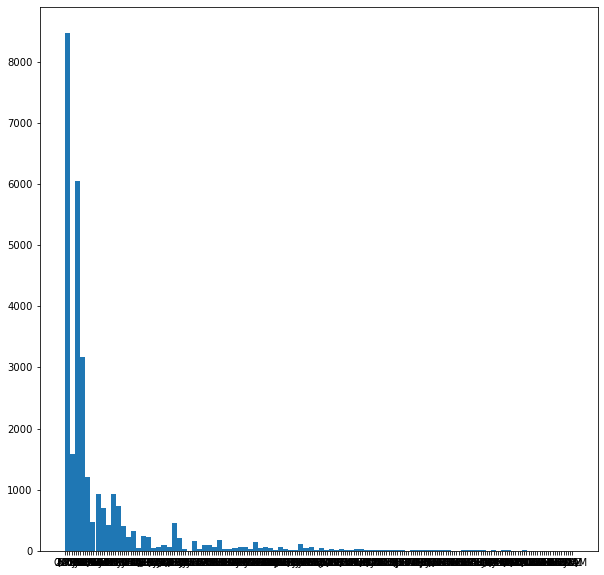

In [17]:
plt.figure(figsize=(10,10))
plt.hist(train['occupation_code'], bins=100)
train['occupation_code'].value_counts()

#### target

#### correlation

<AxesSubplot:>

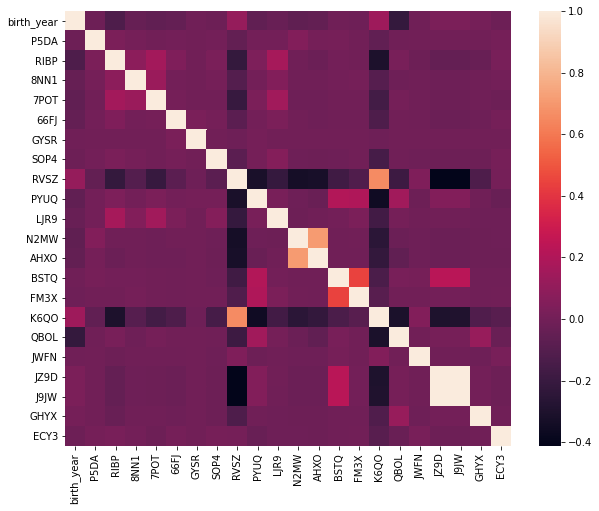

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr())

Product sold per category

In [19]:
prod_counts = []
prods = []

for p in products_name:
    prods.append(p)
    prod_counts.append(train[p].value_counts()[1])
    
product_count = pd.DataFrame.from_dict(dict(zip(prods, prod_counts)), orient='index')
prod = product_count.reset_index().sort_values(0, ascending=False)
prod

,index,0
7,RVSZ,25328
14,K6QO,21629
15,QBOL,6833
8,PYUQ,2173
1,RIBP,1780
17,JZ9D,1425
18,J9JW,1418
20,ECY3,1102
19,GHYX,902
10,N2MW,838


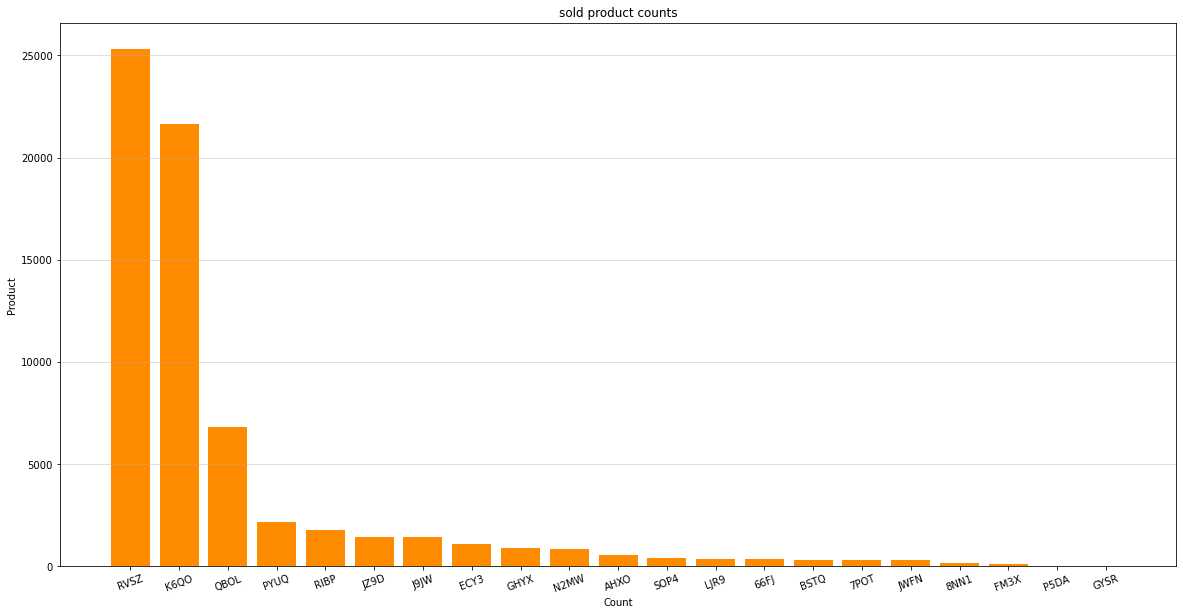

In [20]:
plt.figure(figsize=(20,10))
plt.bar(prod['index'], prod[0], color='darkorange')
plt.title('sold product counts')
plt.xlabel('Count'); plt.ylabel('Product')
plt.grid(axis='y', alpha=0.5)
plt.xticks(rotation='20')
plt.show()

In [21]:
train.head(5)

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


## Preprocessing

In [22]:
test = testset.copy()
train = trainset.copy()

In [23]:
train

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29127,8SBA93U,1/9/2019,F,M,1974,748L,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
29128,Y73ETTO,1/11/2018,M,M,1987,XX25,Q6J6,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
29129,MVXG2LC,1/2/2019,M,M,1985,BOAS,6PE7,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
29130,BUQ8DQN,1/7/2019,M,M,1989,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


#### on divise les features et le target
* features composés de toutes les colonnes, on considèrera pour chaque observation 1 seule label à prédire (train['label'] = 0), 
* target composé d'une colonne 'product_pred' qui contient le label à prédire des features

#### FEATURES

In [24]:
# train set

X_train = []
X_train_columns = train.columns
c = 0
for v in train.values:
    info = v[:8]
    binary = v[8:]
    index = [k for k, i in enumerate(binary) if i == 1]
    for i in index:
        c+=1
        for k in range(len(binary)):
            if k == i:
                binary_transformed = list(copy.copy(binary))
                binary_transformed[i] = 0
                X_train.append(list(info) + binary_transformed + [X_train_columns[8+k]] + [c])

X_train = pd.DataFrame(X_train)
X_train.columns = ['ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
       'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1',
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3', 'product_pred', 'ID2']

In [25]:
X_train

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,product_pred,ID2
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,RVSZ,1
1,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,K6QO,2
2,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,RVSZ,3
3,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,K6QO,4
4,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,SOP4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66348,MVXG2LC,1/2/2019,M,M,1985,BOAS,6PE7,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,K6QO,66349
66349,BUQ8DQN,1/7/2019,M,M,1989,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,RVSZ,66350
66350,BUQ8DQN,1/7/2019,M,M,1989,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,K6QO,66351
66351,DEJBWYU,1/3/2020,M,M,1975,94KC,31JW,90QI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,RVSZ,66352


In [26]:
# test set

X_test = []
true_values = []
c = 0
for v in test.values:
    c += 1
    info = v[:8]
    binary = v[8:]
    index = [k for k, i in enumerate(binary) if i == 1]
    X_test.append(list(info) + list(binary) + [c])
    for k in test.columns[8:][index]:
        true_values.append(v[0] + ' X ' + k)

X_test = pd.DataFrame(X_test)
X_test.columns = ['ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
       'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1',
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3', 'ID2']

In [27]:
X_test

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,ID2
0,F86J5PC,1/12/2018,M,M,1984,94KC,DZRV,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,H6141K3,1/10/2019,M,M,1996,1X1H,J9SY,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2
2,RBAYUXZ,1/1/2020,F,W,1968,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3
3,KCBILBQ,1/2/2019,M,M,1989,94KC,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,LSEC1ZJ,1/2/2020,F,M,1982,UAOD,0KID,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0GMU5UH,1/4/2019,F,M,1986,748L,2A7I,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,9996
9996,I9W11CD,1/8/2019,M,M,1980,UAOD,0KID,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9997
9997,42WTEGT,1/4/2018,M,M,1993,748L,SST3,56SI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9998
9998,8EKC4O9,1/5/2015,F,U,1981,49BM,2A7I,T4MS,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9999


#### TARGET

In [28]:
features_train = []
features_test = []
columns = []

append_features = ['P5DA', 'RIBP', '8NN1', '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 
'N2MW', 'AHXO','BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 
'ECY3', 'ID', 'ID2', 'join_date', 'sex', 'marital_status', 'branch_code', 'occupation_code', 'occupation_category_code',
'birth_year']
for v in append_features:
    features_train.append(X_train[v].values.reshape(-1, 1))
    features_test.append(X_test[v].values.reshape(-1, 1))
    columns.append(np.array([v]))

y_train = X_train[['product_pred']]

In [29]:
features_train = np.concatenate(features_train, axis=1)
features_test = np.concatenate(features_test, axis=1)
columns = np.concatenate(np.array(columns))

X_train = pd.DataFrame(features_train)
X_train.columns = columns
X_test = pd.DataFrame(features_test)
X_test.columns = columns

In [30]:
y_train['product_pred'].value_counts()

RVSZ    25328
K6QO    21629
QBOL     6833
PYUQ     2173
RIBP     1780
JZ9D     1425
J9JW     1418
ECY3     1102
GHYX      902
N2MW      838
AHXO      539
SOP4      431
LJR9      354
66FJ      339
BSTQ      324
7POT      316
JWFN      311
8NN1      157
FM3X      110
P5DA       40
GYSR        4
Name: product_pred, dtype: int64

### Feature engineering
* on tire de la date le nombre de jours, de mois et l'âge du client au moment de son inscription

In [31]:
def transform_date(data):
    data['join_year'] = data['join_date'].apply(lambda x: int(x.split('/')[2]) if (x == x) else np.nan)
    data['join_age'] = data['join_year'] - data['birth_year']
    data.drop(columns=['join_date', 'join_year'], inplace=True)

In [32]:
transform_date(X_train)
transform_date(X_test)

In [33]:
X_train

,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,ID,ID2,sex,marital_status,branch_code,occupation_code,occupation_category_code,birth_year,join_age
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4WKQSBB,1,F,M,1X1H,2A7I,T4MS,1987,32.0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4WKQSBB,2,F,M,1X1H,2A7I,T4MS,1987,32.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CP5S02H,3,F,M,UAOD,2A7I,T4MS,1981,38.0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,CP5S02H,4,F,M,UAOD,2A7I,T4MS,1981,38.0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2YKDILJ,5,M,U,748L,QZYX,90QI,1991,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66348,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,MVXG2LC,66349,M,M,BOAS,6PE7,T4MS,1985,34.0
66349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,BUQ8DQN,66350,M,M,UAOD,2A7I,T4MS,1989,30.0
66350,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,BUQ8DQN,66351,M,M,UAOD,2A7I,T4MS,1989,30.0
66351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,DEJBWYU,66352,M,M,94KC,31JW,90QI,1975,45.0


### Valeurs manquantes

In [34]:
print("trainset :\n",missing_value_rate(X_train), "\n")
print("testset :\n",missing_value_rate(X_test))

trainset :
 P5DA                        0.00000
RIBP                        0.00000
8NN1                        0.00000
7POT                        0.00000
66FJ                        0.00000
GYSR                        0.00000
SOP4                        0.00000
RVSZ                        0.00000
PYUQ                        0.00000
LJR9                        0.00000
N2MW                        0.00000
AHXO                        0.00000
BSTQ                        0.00000
FM3X                        0.00000
K6QO                        0.00000
QBOL                        0.00000
JWFN                        0.00000
JZ9D                        0.00000
J9JW                        0.00000
GHYX                        0.00000
ECY3                        0.00000
ID                          0.00000
ID2                         0.00000
sex                         0.00000
marital_status              0.00000
branch_code                 0.00000
occupation_code             0.00000
occupation_categ

In [35]:
nan_filler = SimpleImputer(missing_values=np.nan, strategy='median')

train_tmp = nan_filler.fit_transform(X_train.iloc[:, -1:])
test_tmp = nan_filler.transform(X_test.iloc[:, -1:])

X_train['join_age'] = train_tmp
X_test['join_age'] = test_tmp

In [36]:
X_train.iloc[:,-1:]

,join_age
0,32.0
1,32.0
2,38.0
3,38.0
4,22.0
...,...
66348,34.0
66349,30.0
66350,30.0
66351,45.0


In [37]:
print("trainset :\n",missing_value_rate(X_train), "\n")
print("testset :\n",missing_value_rate(X_test))

trainset :
 P5DA                        0.0
RIBP                        0.0
8NN1                        0.0
7POT                        0.0
66FJ                        0.0
GYSR                        0.0
SOP4                        0.0
RVSZ                        0.0
PYUQ                        0.0
LJR9                        0.0
N2MW                        0.0
AHXO                        0.0
BSTQ                        0.0
FM3X                        0.0
K6QO                        0.0
QBOL                        0.0
JWFN                        0.0
JZ9D                        0.0
J9JW                        0.0
GHYX                        0.0
ECY3                        0.0
ID                          0.0
ID2                         0.0
sex                         0.0
marital_status              0.0
branch_code                 0.0
occupation_code             0.0
occupation_category_code    0.0
birth_year                  0.0
join_age                    0.0
dtype: float64 

testset :
 

### Type

In [38]:
le = LabelEncoder()
data = X_train.append(X_test)
for v in ['sex', 'marital_status', 'branch_code', 'occupation_code', 'occupation_category_code']:
    data.loc[:,v] = le.fit_transform(data.loc[:,v])
X_train = data[:X_train.shape[0]]
X_test = data[-X_test.shape[0]:]

le.fit(y_train.iloc[:,0])
y_train = pd.DataFrame(le.transform(y_train.iloc[:,0]))
y_train.columns = ['target']

In [39]:
X_train

,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,ID,ID2,sex,marital_status,branch_code,occupation_code,occupation_category_code,birth_year,join_age
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4WKQSBB,1,0,2,0,19,5,1987,32.0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4WKQSBB,2,0,2,0,19,5,1987,32.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CP5S02H,3,0,2,11,19,5,1981,38.0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,CP5S02H,4,0,2,11,19,5,1981,38.0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2YKDILJ,5,1,6,3,185,1,1991,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66348,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,MVXG2LC,66349,1,2,6,46,5,1985,34.0
66349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,BUQ8DQN,66350,1,2,11,19,5,1989,30.0
66350,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,BUQ8DQN,66351,1,2,11,19,5,1989,30.0
66351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,DEJBWYU,66352,1,2,4,30,1,1975,45.0


## Model

In [40]:
X_train = X_train.reindex(["ID", "ID2" ,"sex" , "marital_status" , "birth_year" , "branch_code" , "occupation_code" , "occupation_category_code" , "join_age" , "P5DA", "RIBP", "8NN1",
"7POT", "66FJ", "GYSR", "SOP4", "RVSZ", "PYUQ", "LJR9", "N2MW", "AHXO","BSTQ", "FM3X", "K6QO", "QBOL", "JWFN", "JZ9D", "J9JW", "GHYX", "ECY3"] , axis = 1)

X_test = X_test.reindex(["ID", "ID2" ,"sex" , "marital_status" , "birth_year" , "branch_code" , "occupation_code" , "occupation_category_code" , "join_age" , "P5DA", "RIBP", "8NN1",
"7POT", "66FJ", "GYSR", "SOP4", "RVSZ", "PYUQ", "LJR9", "N2MW", "AHXO","BSTQ", "FM3X", "K6QO", "QBOL", "JWFN", "JZ9D", "J9JW", "GHYX", "ECY3"] , axis = 1)

### Catboost

In [41]:
X_train

,ID,ID2,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,join_age,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1,0,2,1987,0,19,5,32.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,4WKQSBB,2,0,2,1987,0,19,5,32.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CP5S02H,3,0,2,1981,11,19,5,38.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,CP5S02H,4,0,2,1981,11,19,5,38.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2YKDILJ,5,1,6,1991,3,185,1,22.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66348,MVXG2LC,66349,1,2,1985,6,46,5,34.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
66349,BUQ8DQN,66350,1,2,1989,11,19,5,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
66350,BUQ8DQN,66351,1,2,1989,11,19,5,30.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
66351,DEJBWYU,66352,1,2,1975,4,30,1,45.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Entrainement et prediction

In [42]:
cat_features = ['sex', 'marital_status', 'branch_code',
       'occupation_code', 'occupation_category_code']

In [43]:
cat = CatBoostClassifier(
    task_type = 'GPU',
    devices='0:1',
)

In [44]:
cat.fit(X_train.drop(columns=['ID2', 'ID']), y_train, cat_features=cat_features, verbose=True)

Learning rate set to 0.152737
0:	learn: 1.3069185	total: 220ms	remaining: 3m 39s
1:	learn: 1.1369798	total: 427ms	remaining: 3m 32s
2:	learn: 1.0265287	total: 648ms	remaining: 3m 35s
3:	learn: 0.9441164	total: 862ms	remaining: 3m 34s
4:	learn: 0.8805632	total: 1.08s	remaining: 3m 34s
5:	learn: 0.8293531	total: 1.3s	remaining: 3m 35s
6:	learn: 0.7830639	total: 1.52s	remaining: 3m 35s
7:	learn: 0.7477673	total: 1.72s	remaining: 3m 33s
8:	learn: 0.7177872	total: 1.93s	remaining: 3m 32s
9:	learn: 0.6940034	total: 2.15s	remaining: 3m 32s
10:	learn: 0.6751128	total: 2.34s	remaining: 3m 30s
11:	learn: 0.6564490	total: 2.55s	remaining: 3m 29s
12:	learn: 0.6428586	total: 2.74s	remaining: 3m 28s
13:	learn: 0.6301106	total: 2.96s	remaining: 3m 28s
14:	learn: 0.6157287	total: 3.17s	remaining: 3m 28s
15:	learn: 0.6070570	total: 3.37s	remaining: 3m 27s
16:	learn: 0.5987083	total: 3.58s	remaining: 3m 26s
17:	learn: 0.5899960	total: 3.79s	remaining: 3m 26s
18:	learn: 0.5823587	total: 4.02s	remaining: 

In [45]:
X_test

,ID,ID2,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,join_age,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,F86J5PC,1,1,2,1984,4,96,1,34.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,H6141K3,2,1,2,1996,0,128,1,23.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,RBAYUXZ,3,0,7,1968,11,19,5,52.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,KCBILBQ,4,1,2,1989,4,19,5,30.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,LSEC1ZJ,5,0,2,1982,11,3,5,38.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0GMU5UH,9996,0,2,1986,3,19,5,33.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
9996,I9W11CD,9997,1,2,1980,11,3,5,39.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,42WTEGT,9998,1,2,1993,3,200,0,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9998,8EKC4O9,9999,0,6,1981,2,19,5,34.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Prédiction et stockage du résutlat dans un Dataframe

In [46]:
proba = cat.predict_proba(X_test.drop(columns=['ID','ID2'], axis=1))
y_test = pd.DataFrame(proba)
y_test.columns = le.inverse_transform(y_test.columns)

In [47]:
answer_mass = []
for i in range(X_test.shape[0]):
    id = X_test['ID'].iloc[i]
    for c in y_test.columns:
        answer_mass.append([id + ' X ' + c , y_test[c].iloc[i]])

df_answer = pd.DataFrame(answer_mass)
df_answer.columns = ['ID X PCODE', 'Label']

for i in range(df_answer.shape[0]):
    if df_answer['ID X PCODE'].iloc[i] in true_values:
        df_answer['Label'].iloc[i] = 1.0

C:\Users\Tsitohaina\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Exportation vers CSV (score: 0.03)

In [48]:
df_answer

,ID X PCODE,Label
0,F86J5PC X 66FJ,0.000012
1,F86J5PC X 7POT,0.000320
2,F86J5PC X 8NN1,0.000016
3,F86J5PC X AHXO,0.000115
4,F86J5PC X BSTQ,0.000063
...,...,...
209995,WHII93K X PYUQ,0.000016
209996,WHII93K X QBOL,0.000022
209997,WHII93K X RIBP,0.000007
209998,WHII93K X RVSZ,0.999777


In [49]:
df_answer.reset_index(drop=True, inplace=True)
df_answer.to_csv('submission_cat.csv', index=False)

### LGBM

In [50]:
X_train['birth_year'] = X_train.birth_year.astype(float)
X_train.iloc[:,9:] = X_train.iloc[:,9:].astype(int)

X_test['birth_year'] = X_test.birth_year.astype(float)
X_test.iloc[:,9:] = X_test.iloc[:,9:].astype(int)

In [51]:
lgbm = LGBMClassifier(learning_rate=0.01)

lgbm.fit(X_train.drop(columns=['ID2', 'ID']), y_train, categorical_feature=cat_features)

C:\Users\Tsitohaina\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Tsitohaina\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


LGBMClassifier(learning_rate=0.01)

In [52]:
proba = lgbm.predict_proba(X_test.drop(columns=['ID2', 'ID']))
y_test = pd.DataFrame(proba)
y_test.columns = le.inverse_transform(y_test.columns)

In [53]:
answer_mass = []
for i in range(X_test.shape[0]):
    id = X_test['ID'].iloc[i]
    for c in y_test.columns:
        answer_mass.append([id + ' X ' + c , y_test[c].iloc[i]])

df_answer = pd.DataFrame(answer_mass)
df_answer.columns = ['ID X PCODE', 'Label']

for i in range(df_answer.shape[0]):
    if df_answer['ID X PCODE'].iloc[i] in true_values:
        df_answer['Label'].iloc[i] = 1.0

C:\Users\Tsitohaina\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Exportation vers CSV (score: 0.04)

In [54]:
df_answer

,ID X PCODE,Label
0,F86J5PC X 66FJ,0.001780
1,F86J5PC X 7POT,0.002015
2,F86J5PC X 8NN1,0.000770
3,F86J5PC X AHXO,0.002678
4,F86J5PC X BSTQ,0.001479
...,...,...
209995,WHII93K X PYUQ,0.008926
209996,WHII93K X QBOL,0.020579
209997,WHII93K X RIBP,0.020757
209998,WHII93K X RVSZ,0.860458


In [55]:
df_answer.reset_index(drop=True, inplace=True)
df_answer.to_csv('submission_lgbm.csv', index=False)